## Project Overview
The goal of this project is to provide insights and visualization based on the the Top 10 and Bottom 10 cities to Live in 2023 by the Economist Intelligence Unit (EIU). 

It rates __living__ conditions in 173 cities across these five categories: 
- stability
- health care
- culture and environment
- education and infrastructure

## Libraries
First, you need to install `plottable` with the following command: `pip install plottable`. If you're not familar with `plottable` yet, the [table section of the gallery](https://python-graph-gallery.com/table/) has some great tutorials to get started.

We'll also need the following libraries:

- `pandas` for creating a dataframe with our data 

- `matplotlib` for customizing the table and display it

- `pathlib` for navigating file system paths

In [1]:
from pathlib import Path

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
from PIL import Image

from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.plots import circled_image # image

## Dataset
The dataset is gotten from the Economist Intelligence Unit(EIU) latest report. You can request it directly [here](https://www.eiu.com/n/campaigns/global-economic-outlook-march-2023/) or download a sample csv from my github repo [here](https://github.com/fortune-uwha/Global-liveability-Index-2023/blob/main/Data/cities.csv).

In [2]:
df = pd.read_csv('cities.csv')

In [3]:
#Reindex the column to fit the two main ranked categories(Quality of life and Environment)
columns_titles = ["City", "Location", "Rank", "Index", "Stability","Healthcare", "Education", "Culture_Environment","Infrastructure"]
df=df.reindex(columns=columns_titles)

Next we would need the top 10 and bottom 10 country flags. You can grab this from my [repo](https://github.com/fortune-uwha/Global-liveability-Index-2023/tree/main/images)

In [4]:
# Get a list of file paths to all the PNG images in the "country_flags" directory of your system
flag_paths = list(Path("country_flags").glob("*.png"))

# Create a dictionary mapping country names (extracted from file names without extensions) to their corresponding file paths
country_to_flagpath = {p.stem: p for p in flag_paths}

In [5]:
#Change Rank to Integer
df["Rank"] = df["Rank"].round().astype(int)

In [6]:
# Add a "Flag" column to df with country flag file paths 
df.insert(0, "Flag", df["Location"].apply(lambda x: country_to_flagpath.get(x)))

#set "City" as the index
df = df.set_index("City")

In [7]:
df.rename(columns={'Culture_Environment': 'Environment'}, inplace=True)

In [8]:
df.head()

,Flag,Location,Rank,Index,Stability,Healthcare,Education,Environment,Infrastructure
City,,,,,,,,,
Vienna,country_flags\Austria.png,Austria,1,98.4,100.0,100.0,100.0,93.5,100.0
Copenhagen,country_flags\Denmark.png,Denmark,2,98.0,100.0,95.8,100.0,95.4,100.0
Melbourne,country_flags\Australia.png,Australia,3,97.7,95.0,100.0,100.0,95.8,100.0
Sydney,country_flags\Australia.png,Australia,4,97.4,95.0,100.0,100.0,94.4,100.0
Vancouver,country_flags\Canada.png,Canada,5,97.3,95.0,100.0,100.0,97.2,96.4


## Table Specifications
This method consists in changing the properties of interest for a given column. By specifying the name of the column to be changed, we can specify a number of parameters. To do this we import another Class from plottable: `ColumnDefinition`.

Column definitions  contains specific properties such as:

`name` specifies which column to use

`width` specifies the width of the images

`plot_fn` specifies that we want to use the file name to plot the images

Each of which is used below

In [9]:
# The 5 categories grouped into 2 maain ones
basic_services_cols = ["Stability", "Healthcare", "Education"]
infrastructure_env_cols = ["Environment", "Infrastructure"]

## Define column definitions for creating the table with specific properties.
col_defs = (
    [
        ColumnDefinition(
            name="Flag",
            title="",
            textprops={"ha": "center"},
            width=0.5,
            plot_fn=circled_image,
        ),
        ColumnDefinition(
            name="City",
            textprops={"ha": "left", "weight": "bold"},
            width=1.5,
        ),
        ColumnDefinition(
            name="Location",
            textprops={"ha": "center"},
            width=0.75,
        ),
         ColumnDefinition(
            name="Rank",
            textprops={"ha": "center"},
            width=0.75,
        ),
         ColumnDefinition(
            name="Index",
            textprops={"ha": "center"},
            width=0.75,
        ),
        ColumnDefinition(
            name="Stability",
            width=0.75,
            textprops={
                "ha": "center",
                "bbox": {"boxstyle": "circle", "pad": 0.35},
            },
            cmap=normed_cmap(df["Stability"], cmap=matplotlib.cm.PiYG, num_stds=4),
            group="Quality of Life",
        ),
        ColumnDefinition(
            name="Healthcare",
            width=0.75,
            textprops={
                "ha": "center",
                "bbox": {"boxstyle": "circle", "pad": 0.35},
            },
            cmap=normed_cmap(df["Healthcare"], cmap=matplotlib.cm.PiYG, num_stds=4),
            group="Quality of Life",
        ),
         ColumnDefinition(
            name="Education",
            width=0.75,
            textprops={
                "ha": "center",
                "bbox": {"boxstyle": "circle", "pad": 0.35},
            },
            cmap=normed_cmap(df["Education"], cmap=matplotlib.cm.PiYG, num_stds=4),
            group="Quality of Life",
        ),
          ColumnDefinition(
            name="Environment",
            width=0.75,
            textprops={
                "ha": "center",
                "bbox": {"boxstyle": "circle", "pad": 0.35},
            },
            cmap=normed_cmap(df["Environment"], cmap=matplotlib.cm.PiYG, num_stds=4),
            group="Environment",
        ),
             ColumnDefinition(
            name="Infrastructure",
            width=0.75,
            textprops={
                "ha": "center",
                "bbox": {"boxstyle": "circle", "pad": 0.35},
            },
            cmap=normed_cmap(df["Infrastructure"], cmap=matplotlib.cm.PiYG, num_stds=4),
            group="Environment",
        ),
    ])

In [10]:
# Setting font for text rendering to "DejaVu Sans" and adjust the figure's bounding box to be "tight."
plt.rcParams["font.family"] = ["DejaVu Sans"]
plt.rcParams["savefig.bbox"] = "tight"

Now that all those column specifications are available, it is possible to build our final table:

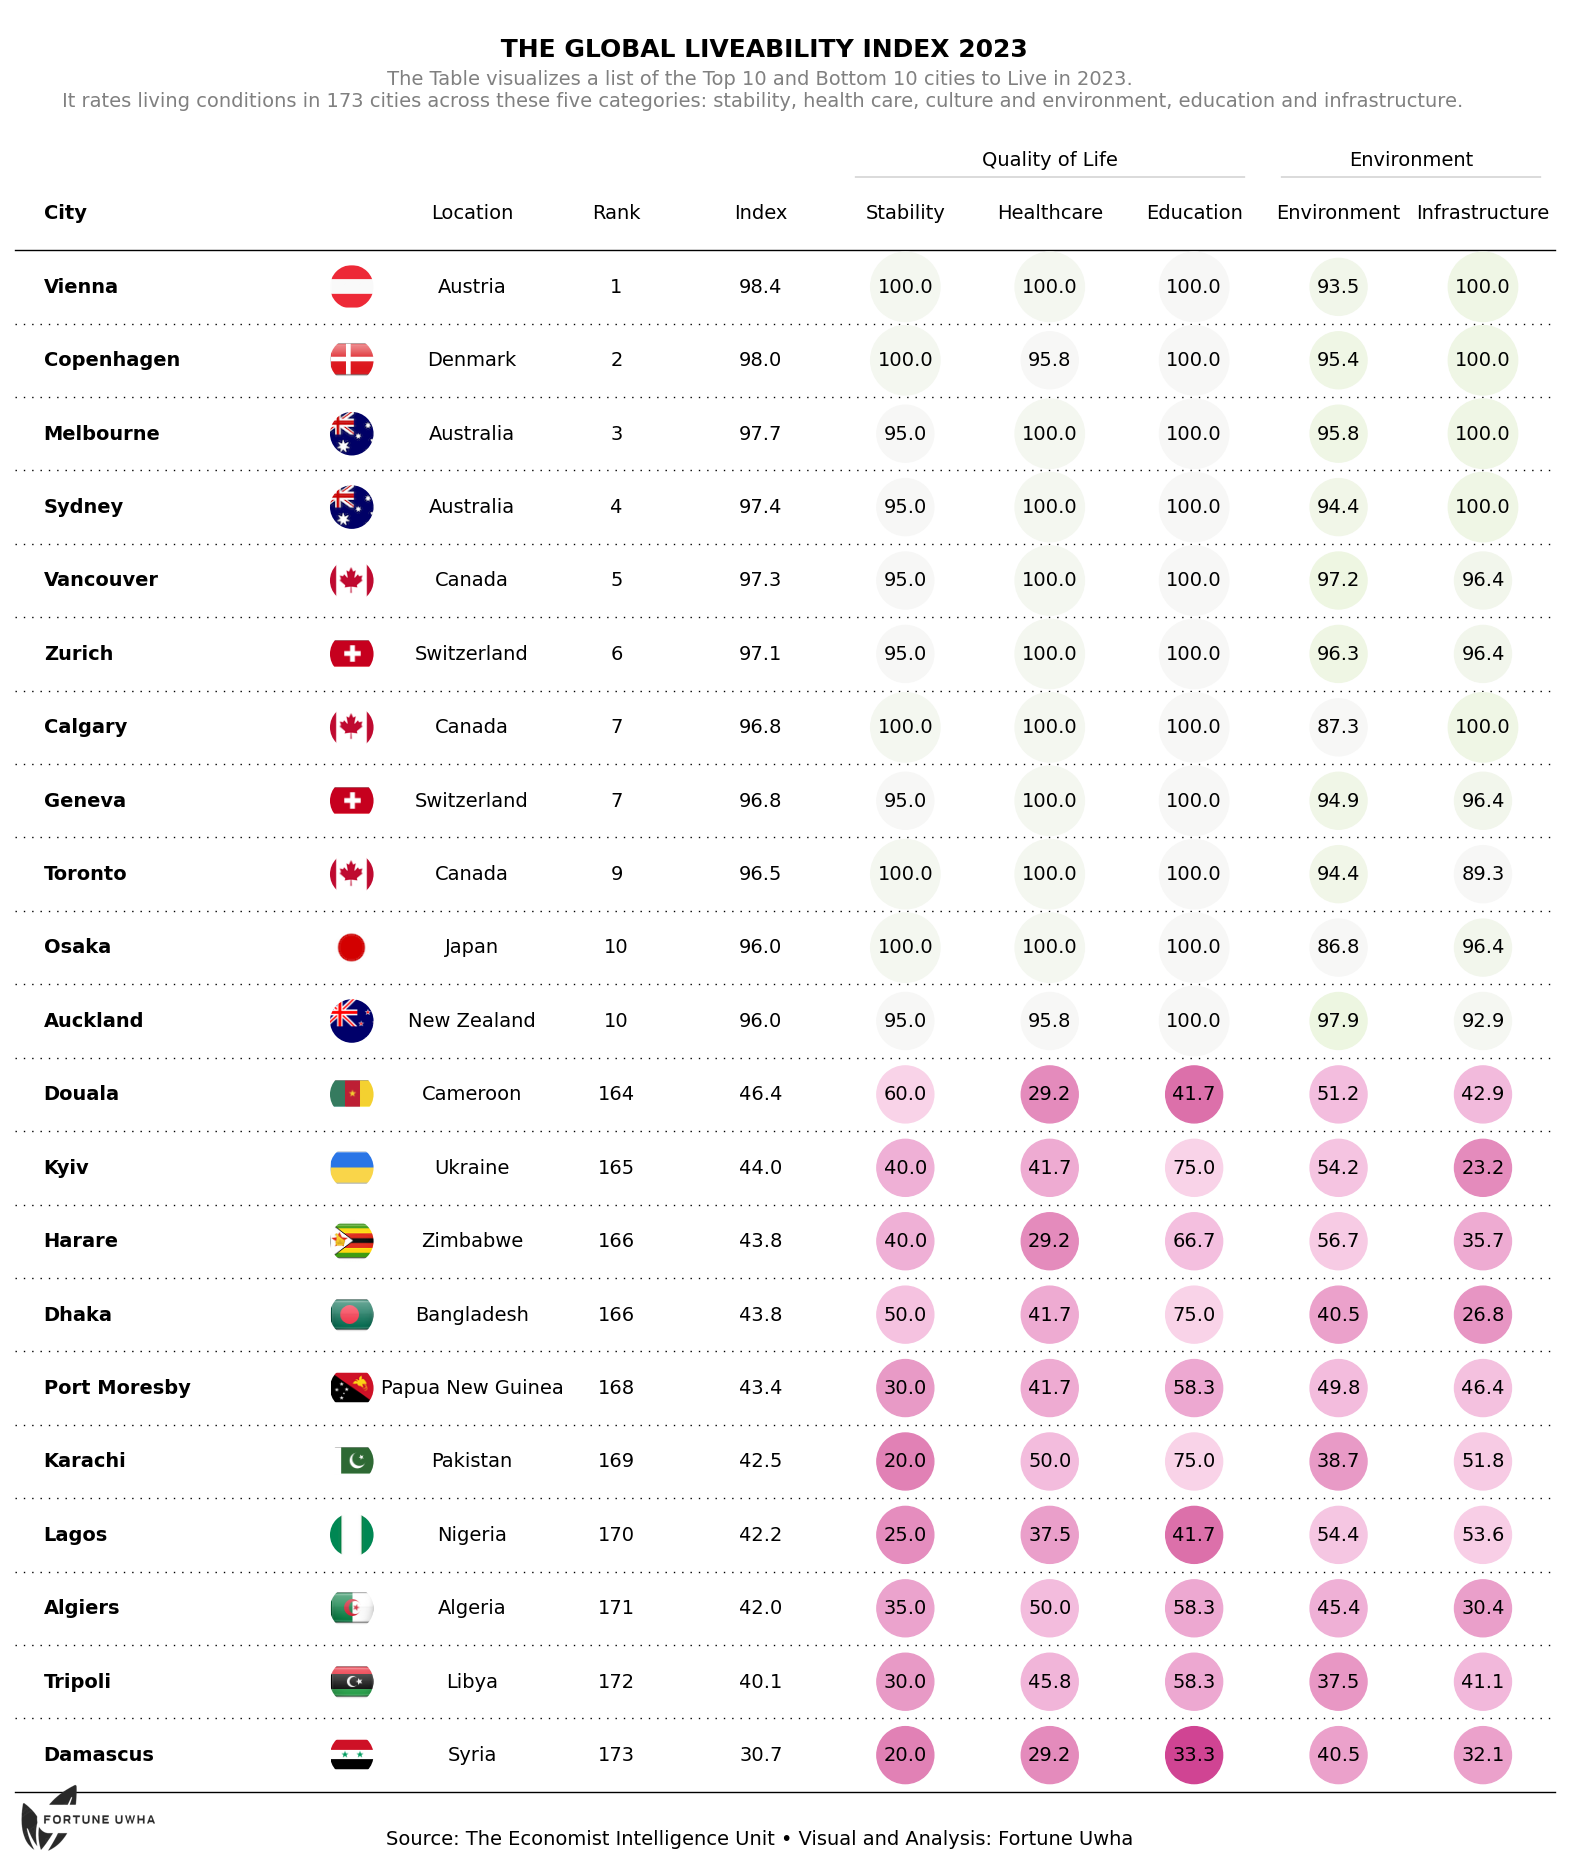

In [11]:
fig, ax = plt.subplots(figsize=(20, 22))

table = Table(
    df,
    column_definitions=col_defs,
    row_dividers=True,
    footer_divider=True,
    ax=ax,
    textprops={"fontsize": 14},
    row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5))},
    col_label_divider_kw={"linewidth": 1, "linestyle": "-"},
    column_border_kw={"linewidth": 1, "linestyle": "-"},
)

# Adding the bold header as a text annotation using \n to create a new line
header_text = "\n THE GLOBAL LIVEABILITY INDEX 2023"
header_props = {'fontsize': 18, 'fontweight': 'bold', 'va': 'center', 'ha': 'center'}
# Adjusting the y-coordinate to bring the header closer to the table
plt.text(0.5, 0.91, header_text, transform=fig.transFigure, **header_props)

# Adding the subtitle at the top in gray
subtitle_text = "\n The Table visualizes a list of the Top 10 and Bottom 10 cities to Live in 2023. \n It rates living conditions in 173 cities across these five categories: stability, health care, culture and environment, education and infrastructure."
subtitle_props = {'fontsize': 14, 'va': 'center', 'ha': 'center', 'color': 'gray'}
plt.text(0.5, 0.89, subtitle_text, transform=fig.transFigure, **subtitle_props)

# Adding the footer text
footer_text = "Source: The Economist Intelligence Unit • Visual and Analysis: Fortune Uwha"
footer_props = {'fontsize': 14, 'va': 'center', 'ha': 'center'}
# Adjusting the y-coordinate to position the footer closer to the bottom of the figure
plt.text(0.5, 0.09, footer_text, transform=fig.transFigure, **footer_props)

# Load and resize the logo image using Pillow
logo_path = "logo.png"  # Replace with the path to your logo image
logo = Image.open(logo_path)
# Resize the logo to the desired dimensions
new_logo_size = (180, 100)  # Adjust to your preferred size
logo = logo.resize(new_logo_size)
# Convert the PIL Image to a NumPy array
logo = np.array(logo)
# Position the logo on the right side of the page
xo = 0.5  # Adjust to position the logo where you want
yo = 0.09

plt.figimage(logo, xo=xo, yo=yo, origin='upper')

fig.savefig("eiu_table.png", facecolor=ax.get_facecolor(), dpi=200)